![Pandas Logo](http://pandas.pydata.org/_static/pandas_logo.png)

# <span style="color:blue">Week 08 - Introduction to Pandas </span>

## <span style="color:red">Today's Agenda </span>
- Pandas: Introduction
    - Series
    - DataFrames
    - Indexing, Selecting, Filtering
    - Drop columns
    - Handling missing Data
    

In [1]:
# Importing modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("notebook")
import matplotlib
matplotlib.rc("text", usetex=False)

# Series
A _Series_ is a one-dimensional array-like object containing an array of data and an associated array of __data labels__.
One can use any NumPy data type to assign to the _Series_

Creating a Series:

In [2]:
np.random.seed(1)

np.random.random(10)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01])

In [3]:
series_1 = pd.Series(np.random.random(10))
series_1

0    0.419195
1    0.685220
2    0.204452
3    0.878117
4    0.027388
5    0.670468
6    0.417305
7    0.558690
8    0.140387
9    0.198101
dtype: float64

One can get a NumPy array from the Series, by typing:

In [4]:
series_1.values

array([0.41919451, 0.6852195 , 0.20445225, 0.87811744, 0.02738759,
       0.67046751, 0.4173048 , 0.55868983, 0.14038694, 0.19810149])

# Reindexing

One can also get the indices of each element, by typing:

In [5]:
series_1.index.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

One can also have a custom set of indices:

In [6]:
# import string
# alphabet = string.lowercase
# alphabet = np.array([x for x in alphabet])[0:10]
# alphabet

alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
alphabet

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [7]:
series_2 = pd.Series(np.random.random(len(alphabet)), index=alphabet)
series_2

a    0.800745
b    0.968262
c    0.313424
d    0.692323
e    0.876389
f    0.894607
g    0.085044
h    0.039055
i    0.169830
j    0.878143
dtype: float64

One can select only a subsample of the _Series_

In [8]:
series_1[[0, 1, 2]]

0    0.419195
1    0.685220
2    0.204452
dtype: float64

In [9]:
series_1[[1,3,4]]

1    0.685220
3    0.878117
4    0.027388
dtype: float64

In [10]:
series_2[['a','d','j']]

a    0.800745
d    0.692323
j    0.878143
dtype: float64

# Arithmetic and function Mapping

You can also perform numerical expressions

In [11]:
series_1**2

0    0.175724
1    0.469526
2    0.041801
3    0.771090
4    0.000750
5    0.449527
6    0.174143
7    0.312134
8    0.019708
9    0.039244
dtype: float64

In [12]:
series_1[1]**2

0.4695257637239847

Or find values greater than some value '__x__'

In [13]:
x = 0.5
series_1[(series_1 >= x) & (series_1 < 0.8)]

1    0.685220
5    0.670468
7    0.558690
dtype: float64

You can apply functions to a column, and save it as a _new_ Series

In [14]:
import sys
def exponentials(arr, basis=10.):
    """
    Uses the array `arr` as the exponents for `basis`
    
    Parameters
    ----------
    arr: numpy array, list, pandas Series; shape (N,)
        array to be used as exponents of `basis`
    
    power: int or float, optional (default = 10)
        number used as the basis
    
    Returns
    -------
    exp_arr: numpy array or list, shape (N,)
        array of values for `basis`**`arr`
    """
    if isinstance(arr, list):
        exp_arr = [basis**x for x in arr]
        return exp_arr        
    elif isinstance(arr, np.ndarray) or isinstance(arr, pd.core.series.Series):
        exp_arr = basis**arr
        return exp_arr
    else:
        cmd = ">>>> `arr` is not a list nor a numpy array"
        cmd +="\n>>>> Please give the correct type of object"
        print(cmd)
        sys.exit(1)

In [15]:
exponentials(series_1[(series_1 >= x) & (series_1 > 0.6)]).values

array([4.84417139, 7.55296438, 4.68238921])

You can also __create__ a _Series_ using a _dictionary_ (we talked about these on __Week 4__)

In [16]:
labels_arr = ['foo', 'bar', 'baz']
data_arr   = [100, 200, 300]
dict_1     = dict(zip(labels_arr, data_arr))
dict_1

{'foo': 100, 'bar': 200, 'baz': 300}

In [17]:
series_3 = pd.Series(dict_1)
series_3

foo    100
bar    200
baz    300
dtype: int64

# Handling Missing Data

One of the most useful features of pandas is that it __can handle missing data__ quite easily:

In [18]:
index = ['foo', 'bar', 'baz', 'qux']
series_4 = pd.Series(dict_1, index=index)
series_4

foo    100.0
bar    200.0
baz    300.0
qux      NaN
dtype: float64

In [19]:
pd.isnull(series_4)

foo    False
bar    False
baz    False
qux     True
dtype: bool

In [20]:
series_3

foo    100
bar    200
baz    300
dtype: int64

In [21]:
series_3 + series_4

bar    400.0
baz    600.0
foo    200.0
qux      NaN
dtype: float64

So using a Series is powerful, but __DataFrames__ are probably what gets used the most since it represents a _tabular data structure_ containing an ordered collection of __columns__ and __rows__.

# DataFrames

A DataFrame is a "tabular data structure" containing an _ordered collection of columns_. Each column can a have a __different__ data type.

Row and column operations are treated roughly symmetrically.
One can obtain a DataFrame from a normal dictionary, or by reading a file with columns and rows.

Creating a DataFrame

In [22]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'popu' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = pd.DataFrame(data_1)
df_1

,state,year,popu
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


This DataFrame has 4 rows and 3 columns by the name "_pop_", "_state_", and "_year_".

The way to __access__ a DataFrame is quite similar to that of accessing a _Series_.<br>
To access a __column__, one writes the name of the `column`, as in the following example:

In [23]:
df_1['popu']

0    5.0
1    5.1
2    5.2
3    4.0
4    4.1
Name: popu, dtype: float64

In [24]:
df_1.popu

0    5.0
1    5.1
2    5.2
3    4.0
4    4.1
Name: popu, dtype: float64

One can also handle __missing data__ with DataFrames.
Like Series, columns that are not present in the data are NaNs:

In [25]:
df_2 = pd.DataFrame(data_1, columns=['year', 'state', 'popu', 'unempl'])
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN
4,2015,MD,4.1,NaN


In [26]:
df_2['state']

0    VA
1    VA
2    VA
3    MD
4    MD
Name: state, dtype: object

One can __retrieve a row__ by:

In [27]:
df_2.iloc[1:4]

,year,state,popu,unempl
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN


Editing a DataFrame is quite easy to do. One can _assign_ a Series to a column of the DataFrame. If the Series is a list or an array, __the length must match the DataFrame__.

In [28]:
unempl = pd.Series([1.0, 2.0, 10.], index=[1,3,5])
unempl

1     1.0
3     2.0
5    10.0
dtype: float64

In [29]:
df_2['unempl'] = unempl
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


In [30]:
df_2.unempl.isnull()

0     True
1    False
2     True
3    False
4     True
Name: unempl, dtype: bool

You can also __transpose__ a DataFrame, i.e. switch rows by columns, and columns by rows

In [31]:
df_2.T

,0,1,2,3,4
year,2012,2013,2014,2014,2015
state,VA,VA,VA,MD,MD
popu,5,5.1,5.2,4,4.1
unempl,NaN,1,NaN,2,NaN


Now, let's say you want to show __only the 'year' and 'popu' columns__.
You can do it by:

In [32]:
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


In [33]:
df_2[['year', 'unempl']]

,year,unempl
0,2012,NaN
1,2013,1.0
2,2014,NaN
3,2014,2.0
4,2015,NaN


# Dropping Entries

Let's say you only need a subsample of the table that you have, and you need to __drop__ a column from the DataFrame.
You can do that by using the '_drop_' option:

In [34]:
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


In [35]:
df_3 = df_2.drop('unempl', axis=1)
df_3

df_2.drop('unempl', axis=1)

,year,state,popu
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


In [36]:
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


You can also __drop certain rows__:

In [37]:
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


In [38]:
df_4 = df_2.drop([1,2])
df_4

,year,state,popu,unempl
0,2012,VA,5.0,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


__Look at this carefully__! The DataFrame _kept_ preserved the same indices as for __df_2__.

If you can to __reset__ the indices, you can do that by:

In [39]:
df_4.reset_index(inplace=True)
df_4

,index,year,state,popu,unempl
0,0,2012,VA,5.0,NaN
1,3,2014,MD,4.0,2.0
2,4,2015,MD,4.1,NaN


# Gaia Dataset 
![Gaia](http://pbs.twimg.com/profile_images/1266601315/gaiaLogo_reasonably_small.png)

Pandas is great at reading Data tables and CSV files, and other kinds of documents.
For the remainder of this notebook, we will be using the [Gaia](https://www.cosmos.esa.int/web/gaia)'s DR1 catalogue.

In [40]:
# Path to online file
url_path = 'http://cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source/csv/GaiaSource_1000172165251650944_1000424567594791808.csv.gz'

# Converting data to DataFrame
gaia_df = pd.read_csv(url_path, compression='gzip')

In [41]:
gaia_df.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper
0,1635721458409799680,Gaia DR2 1000225938242805248,1000225938242805248,1197051105,2015.5,103.447529,0.041099,56.022025,0.045175,0.582790,...,0.0595,0.0080,0.1351,200111.0,1.024730,1.017359,1.038814,1.075774,0.801798,1.349751
1,1635721458409799680,Gaia DR2 1000383512003001728,1000383512003001728,598525552,2015.5,105.187856,0.016978,56.267982,0.016904,1.385686,...,0.2430,0.0830,0.4030,200111.0,1.388711,1.311143,1.453106,1.937890,1.852440,2.023341
2,1635721458409799680,Gaia DR2 1000274106300491264,1000274106300491264,299262776,2015.5,103.424758,0.464608,56.450903,0.582490,0.314035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1635721458409799680,Gaia DR2 1000396156385741312,1000396156385741312,1148557518,2015.5,105.049751,0.838232,56.508777,0.744511,1.939951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1635721458409799680,Gaia DR2 1000250024419296000,1000250024419296000,574278759,2015.5,103.352525,0.023159,56.395144,0.022836,0.747108,...,0.2870,0.1196,0.4051,200111.0,1.507958,1.435618,1.540208,2.427377,2.152597,2.702158


### Shape, Columns and Rows

You can get the shape of the "gaia_df" DataFrame by typing: 

In [42]:
gaia_df.shape

(14209, 94)

That means there are __218453 rows__ and __57 columns__.

To get an array of the columns available, one could write:

In [43]:
gaia_df.columns.values.sort()
gaia_df.columns.values

array(['a_g_percentile_lower', 'a_g_percentile_upper', 'a_g_val',
       'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_gof_al',
       'astrometric_matched_observations', 'astrometric_n_bad_obs_al',
       'astrometric_n_good_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_obs_al', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_pseudo_colour',
       'astrometric_pseudo_colour_error', 'astrometric_sigma5d_max',
       'astrometric_weight_al', 'b', 'bp_g', 'bp_rp', 'dec', 'dec_error',
       'dec_parallax_corr', 'dec_pmdec_corr', 'dec_pmra_corr',
       'designation', 'duplicated_source', 'e_bp_min_rp_percentile_lower',
       'e_bp_min_rp_percentile_upper', 'e_bp_min_rp_val', 'ecl_lat',
       'ecl_lon', 'flame_flags', 'frame_rotator_object_type', 'g_rp', 'l',
       'lum_percentile_lower', 'lum_percentile_upper', 'lum_val',
       'matched_observations', 'mean_varpi_factor_al', 'parallax',
  

Let's say you only want a DataFrame with the the colums:
- ra (right ascension)
- dec (declination)
- l (galactic longitude)
- b (galactic latitude)

You do this by using the __loc__ option for the DataFrame:

In [44]:
gaia_df_2 = gaia_df.loc[:,['ra','dec','l','b']]

# Displaying the first 15 lines
gaia_df_2.head(15)

,ra,dec,l,b
0,103.447529,56.022025,160.163475,22.533932
1,105.187856,56.267982,160.174346,23.534087
2,103.424758,56.450903,159.712110,22.635989
3,105.049751,56.508777,159.899324,23.518554
4,103.352525,56.395144,159.758838,22.582657
5,101.929791,55.973333,159.959619,21.705035
6,101.853926,56.129320,159.785705,21.709303
7,105.128850,56.285081,160.147553,23.506483
8,103.396330,56.714410,159.432230,22.690559
9,101.780437,55.945333,159.962507,21.616907


This selects all of the rows, and only the selected columns in the list.

You can also select only a subsample of the rows as well, as in the following example.
Let's say I just want a random subsample of __10%__ of the galaxies in the Gaia DR1 catalogue. I can do that by:

In [45]:
import random
random.sample

<bound method Random.sample of <random.Random object at 0x7ff02e840c18>>

In [46]:
# Decission indices to select from DataFrame
import random

# Number of rows
nrows = len(gaia_df_2)

# Randomly selecting `nrows` from `gaia_df_2`
gaia_df_3 = gaia_df_2.sample(nrows)

gaia_df_3.shape

(14209, 4)

I'm __re-normalizing__ the indices of this DataFrame

In [47]:
gaia_df_3.reset_index(inplace=True, drop=True)
gaia_df_3

,ra,dec,l,b
0,102.023218,56.433992,159.500110,21.886331
1,105.272250,56.502381,159.938521,23.636142
2,105.087569,56.445058,159.972272,23.523299
3,103.359287,56.193791,159.970039,22.532502
4,103.240760,56.630222,159.495644,22.585832
5,103.222515,56.549474,159.577022,22.554616
6,103.361986,56.583872,159.563251,22.637842
7,103.775851,56.168097,160.063471,22.749245
8,101.836603,56.119531,159.792805,21.697240
9,102.678893,56.936834,159.086470,22.371832


You can produce __plots__ directly from the DataFrame

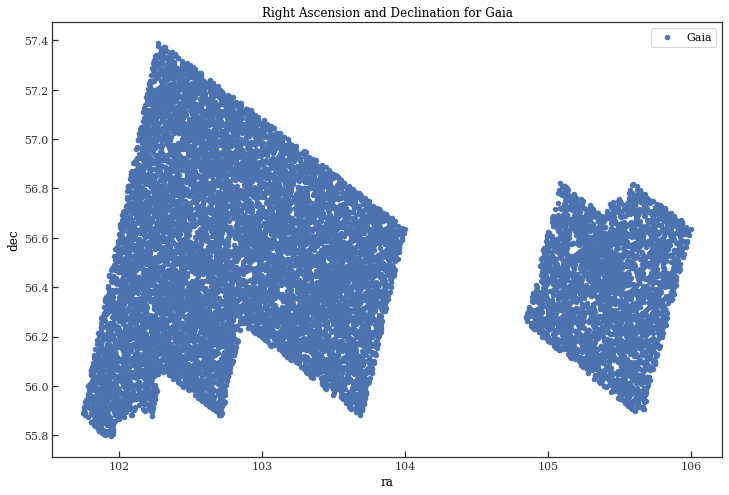

In [48]:
title_txt = 'Right Ascension and Declination for Gaia'

gaia_df_3.plot('ra','dec',       # Columns to plot
               kind='scatter',   # Kind of plot. In this case, it's `scatter`
               label='Gaia',     # Label of the points
               title=title_txt,  # Title of the figure
               color='#4c72b0',  # Color of the points
               figsize=(12,8))  # Size of the fiure

Or even __Scatterplot Matrices__:

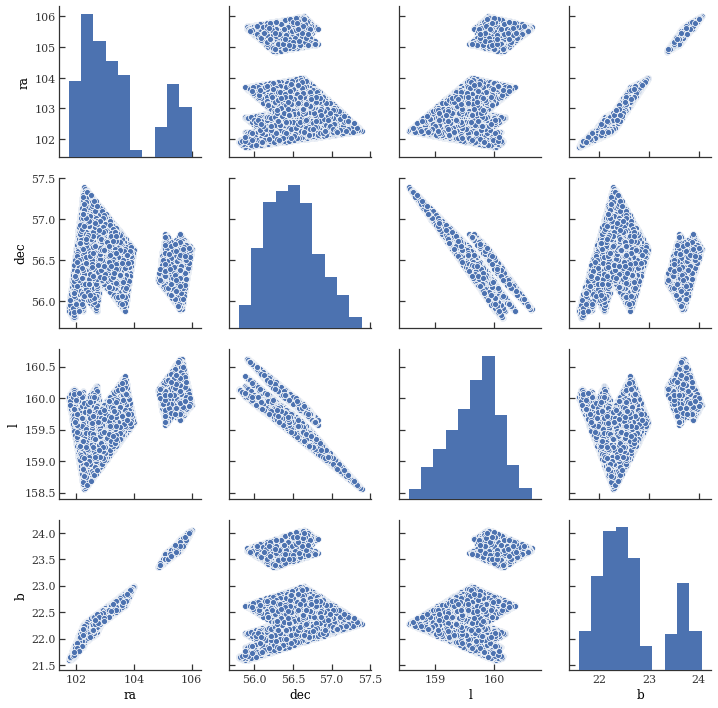

In [49]:
sns.pairplot(gaia_df_3, plot_kws={'color': '#4c72b0'}, diag_kws={'color': '#4c72b0'})

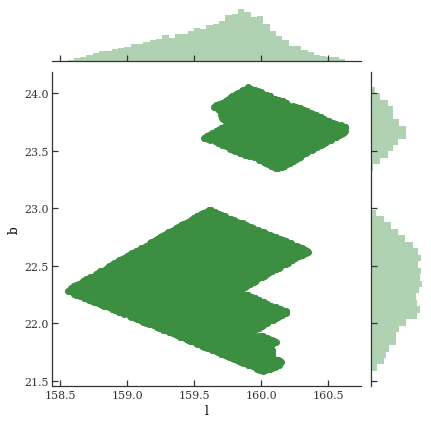

In [50]:
sns.jointplot(gaia_df_3['l'], gaia_df_3['b'], color='#3c8f40')

# Indexing, Selecting, Filtering Data

Now I want to filter the data based on __ra__ and __dec__:

I want to select all the stars within:
- 45 < RA < 50
- 5 < Dec < 10

Normally, you would could do in numpy using the __`np.where`__ function, like in the following example:

In [51]:
ra_arr = gaia_df.ra.values
dec_arr = gaia_df.dec.values

In [52]:
# Just showing the first 25 elements
np.column_stack((ra_arr, dec_arr))[0:25]

array([[103.44752895,  56.02202543],
       [105.18785594,  56.2679821 ],
       [103.42475813,  56.45090293],
       [105.04975071,  56.50877738],
       [103.35252488,  56.39514381],
       [101.92979073,  55.97333308],
       [101.85392576,  56.12931976],
       [105.12884963,  56.28508092],
       [103.39632957,  56.7144103 ],
       [101.78043734,  55.94533326],
       [103.50036565,  56.84462941],
       [105.64948082,  56.63252739],
       [103.18961712,  56.81515376],
       [103.53014423,  55.98817459],
       [105.93886175,  56.58868695],
       [102.24453393,  56.64103702],
       [102.02432422,  56.0158414 ],
       [103.0848673 ,  56.25264172],
       [102.30172541,  56.6658301 ],
       [103.28806439,  56.2536194 ],
       [103.05853189,  56.72134178],
       [102.0578448 ,  56.39003547],
       [103.71357369,  56.62167297],
       [103.37050966,  56.11391562],
       [103.44554963,  56.29543043]])

In [53]:
## Numpy way of finding the stars that meet the criteria

ra_min, ra_max = (102, 104)
dec_min, dec_max = (56.4, 56.7)

# RA critera
ra_idx = np.where((ra_arr >= ra_min) & (ra_arr <= ra_max))[0]

# Dec criteria
dec_idx = np.where((dec_arr >= dec_min) & (dec_arr <= dec_max))[0]

# Finding `intersecting' indices that meet both criteria
radec_idx = np.intersect1d(ra_idx, dec_idx)

# Selecting the values from only those indices
ra_new = ra_arr[radec_idx]
dec_new = dec_arr[radec_idx]

# Printing out ra and dec for corresponding indices
print(np.column_stack((ra_new, dec_new)))

[[103.42475813  56.45090293]
 [102.24453393  56.64103702]
 [102.30172541  56.6658301 ]
 ...
 [103.81978156  56.62006303]
 [103.31712396  56.61945699]
 [103.57468884  56.4318757 ]]


This is rather convoluted and __long__, and one can easily make a mistake if s/he doesn't keep track of which arrays s/he is using!

In Pandas, this is __much easier!!__

In [54]:
gaia_df_4 = gaia_df.loc[(
                (gaia_df.ra >= ra_min) & (gaia_df.ra <= ra_max) &
                (gaia_df.dec >= dec_min) & (gaia_df.dec <= dec_max))]
gaia_df_4[['ra','dec']]

,astrometric_excess_noise_sig,astrometric_matched_observations
2,103.424758,56.450903
15,102.244534,56.641037
18,102.301725,56.665830
22,103.713574,56.621673
32,103.462653,56.532017
35,103.360486,56.413851
36,103.676326,56.623116
39,103.085718,56.447884
40,103.783947,56.521326
46,102.206913,56.640966


# <span style="color:red">Future of Pandas </span>
Pandas is a __great__ for handling data, especially comma-delimited or space-separated data. Pandas is also compatible with many other packages, like __seaborn__, __astropy__, NumPy, etc.

We will have another lecture on Pandas that will cover much more advanced aspects of Pandas. __Make sure you keep checking the schedule!__

# <span style="color:blue">Resources </span>
- [12 Useful Pandas Techniques in Python for Data Manipulation](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)
- [Datacamp Pandas Tutorial](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
- [Top 8 resources for learning data analysis with pandas](http://www.dataschool.io/best-python-pandas-resources/)